In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Load the data
df = pd.read_csv('US_Accidents_March23.csv')

In [40]:
df = df[['ID', 'Severity', 'Weather_Condition']].dropna().reset_index(drop=True)

In [76]:
weather_groups = {
    'Clear/Fair': ['Clear', 'Fair', 'Partly Cloudy', 'Scattered Clouds', 'Mostly Cloudy','Overcast', 'Cloudy'],
    'Rain': ['Rain', 'Heavy Rain', 'Freezing Drizzle', 'Drizzle'],
    'Snow/Ice': ['Snow', 'Heavy Snow', 'Freezing Rain', 'Sleet', 'Wintry Mix'],
    'Fog/Haze': ['Fog', 'Haze',],
    'Storm': ['Thunderstorm', 'Thunderstorms and Rain', 'T-Storm']
}

In [44]:
# Define weather condition groups
weather_groups = {
    'Clear/Fair': [
        'Clear', 'Fair', 'Partly Cloudy', 'Scattered Clouds', 
        'Mostly Cloudy', 'Overcast', 'Cloudy',
        'Fair / Windy', 'Partly Cloudy / Windy', 'Mostly Cloudy / Windy', 
        'Cloudy / Windy'
    ],
    
    'Rain': [
        'Rain', 'Light Rain', 'Heavy Rain', 'Drizzle', 'Light Drizzle', 
        'Heavy Drizzle', 'Rain Showers', 'Light Rain Showers', 
        'Light Rain Shower', 'Rain Shower', 'Heavy Rain Showers',
        'Showers in the Vicinity', 'Rain / Windy', 'Heavy Rain / Windy',
        'Light Rain / Windy', 'Light Rain Shower / Windy', 
        'Rain Shower / Windy', 'Heavy Rain Shower / Windy', 
        'Heavy Rain Shower', 'Drizzle and Fog', 'Light Drizzle / Windy',
        'Drizzle / Windy', 'Rain and Sleet'
    ],
    
    'Snow/Ice': [
        'Snow', 'Light Snow', 'Heavy Snow', 'Sleet', 'Light Sleet', 
        'Heavy Sleet', 'Wintry Mix', 'Freezing Rain', 'Heavy Freezing Rain',
        'Light Freezing Rain', 'Freezing Drizzle', 'Heavy Freezing Drizzle',
        'Light Freezing Drizzle', 'Ice Pellets', 'Light Ice Pellets', 
        'Heavy Ice Pellets', 'Snow Grains', 'Light Snow Grains',
        'Snow Showers', 'Light Snow Shower', 'Light Snow Showers',
        'Snow and Sleet', 'Light Snow and Sleet', 'Blowing Snow', 
        'Heavy Blowing Snow', 'Light Blowing Snow', 'Blowing Snow / Windy',
        'Blowing Snow Nearby', 'Low Drifting Snow', 'Drifting Snow',
        'Drifting Snow / Windy', 'Snow / Windy', 'Heavy Snow / Windy',
        'Light Snow / Windy', 'Wintry Mix / Windy', 
        'Light Freezing Rain / Windy', 'Freezing Rain / Windy',
        'Light Snow and Sleet / Windy', 'Snow and Sleet / Windy',
        'Sleet / Windy', 'Heavy Freezing Rain / Windy',
        'Light Sleet / Windy', 'Heavy Sleet / Windy',
        'Light Snow Shower / Windy', 'Small Hail', 'Hail', 'Light Hail'
    ],
    
    'Fog/Haze': [
        'Fog', 'Haze', 'Mist', 'Shallow Fog', 'Patches of Fog', 
        'Light Freezing Fog', 'Light Haze', 'Light Fog', 'Partial Fog',
        'Fog / Windy', 'Haze / Windy', 'Mist / Windy', 
        'Patches of Fog / Windy', 'Partial Fog / Windy', 
        'Shallow Fog / Windy'
    ],
    
    'Severe Weather': [
        'Tornado', 'Funnel Cloud', 'Squalls', 'Squalls / Windy', 
        'Volcanic Ash'
    ],
}

In [77]:
# Create a mapping from weather condition to group
condition_to_group = {}
for group, conditions in weather_groups.items():
    for condition in conditions:
        condition_to_group[condition] = group

In [78]:
# Map weather conditions to groups
df['Weather_Group'] = df['Weather_Condition'].map(condition_to_group)
df = df.dropna()

/var/folders/gh/ndsp1k7x0d13pyysh08mswl40000gn/T/ipykernel_24668/3053910290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather_Group'] = df['Weather_Condition'].map(condition_to_group)


In [79]:
# Calculate average severity by weather group
avg_severity = df.groupby('Weather_Group')['Severity'].mean().sort_values(ascending=False)

# Exclude Storm category only
avg_severity = avg_severity.drop(['Severe Weather'], errors='ignore')

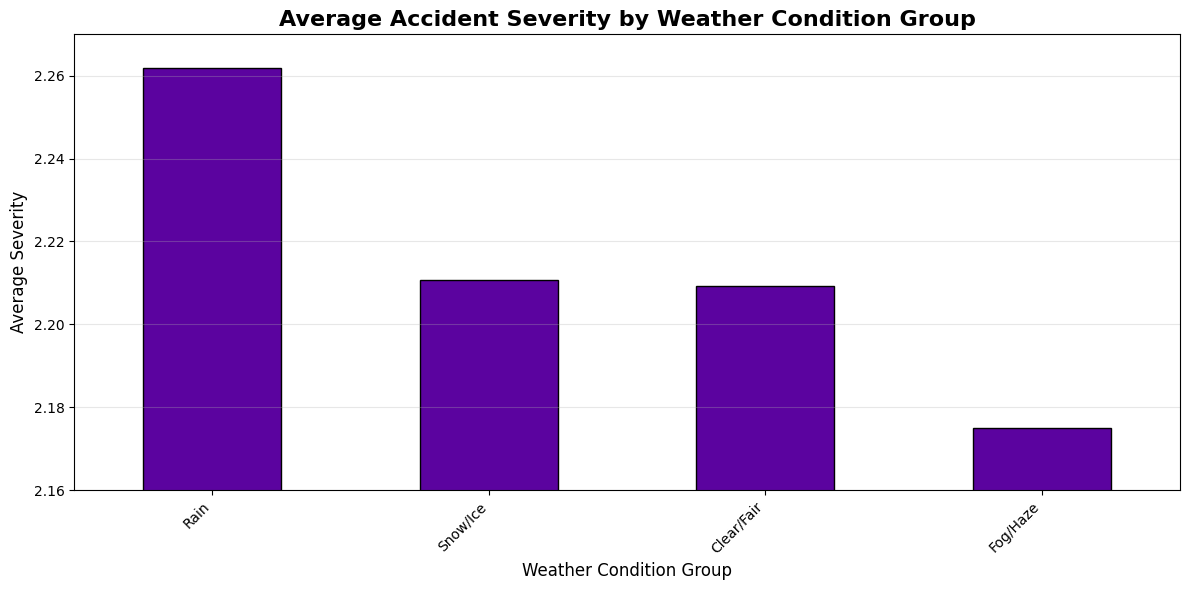

In [81]:
# Create bar chart
plt.figure(figsize=(12, 6))
avg_severity.plot(kind='bar', color='#5b039f', edgecolor='black')
plt.title('Average Accident Severity by Weather Condition Group', fontsize=16, fontweight='bold')
plt.xlabel('Weather Condition Group', fontsize=12)
plt.ylabel('Average Severity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(2.16, 2.27)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()